# Makemore multi-layer perceptron
- predictions from taking one character of context was not very good
- to take more context
- [A Neural Probabilistic Language Model 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)
  - 17k word vocabulary
  - tune embeddings of each word using back propogation
  - using multi layer neural network to predict next word
  - iteratively tuned to maximize log likelihood of the training data
- this will still be a character level, paper builds a word level language model
- take 3 previous words and try to predict the 4th in a sequence
  - look up table called C (17k x 30) corresponds to the embedding vector for that word
  - 30 neurons for 3 words (90 neurons)
  - C shared across all the neurons
  - one hidden layer (hyperparameter) (ordinary hyperbolic tangent hidden layer)
  - computes with a softmax (exponentiated and normalized) output layer (17k nuerons) which guarantee positive probabilities summing to 1
- parameters
  - weights and bias of output layer
  - weights and bias of hidden layer
  - embedding lookup table C
  - all optimized using backprop

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in names
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
# build the vocab of characters and mappings to/from integers
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset
block_size = 3 # context length: how many characters to predict the next
X, Y = [], [] # X input, Y labels
for w in words[:5]: # only take the first 5 for now
    print(w)
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), "---->", itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
# build a neural network that takes the Xs and predicts the Ys

In [8]:
# build a embedding lookup table C
# 27 characters into 2 dimensional space vs (paper) 17K in 30
C = torch.randn((27, 2))
C

tensor([[-0.6656,  2.2600],
        [ 0.0203,  2.3949],
        [-0.3828, -1.3962],
        [ 0.1639, -0.4438],
        [-0.3944, -0.1934],
        [-1.0751,  0.5820],
        [-0.9525, -0.5099],
        [-0.0796, -0.3016],
        [ 0.6152, -1.8606],
        [-0.5664, -1.4387],
        [ 0.6576, -0.8443],
        [-0.7852, -0.8944],
        [ 0.8502,  0.2863],
        [ 0.7423, -1.1626],
        [ 0.4805,  0.3623],
        [ 0.0753, -1.2627],
        [-0.1635,  0.8224],
        [-0.6891,  1.5347],
        [ 0.4772, -0.5397],
        [ 2.5322,  0.4706],
        [-0.8584, -1.1596],
        [ 0.7679, -0.3541],
        [ 1.4926, -0.8276],
        [-0.8372,  0.5720],
        [-0.3026,  1.9847],
        [-0.8740, -0.8703],
        [ 1.0611,  0.1424]])

In [9]:
# single individual integer embedding
C[5]

tensor([-1.0751,  0.5820])

In [10]:
# Python indexing allows us to index with another list
# X is the int values of 3 characters
C[X].shape, C[X]

(torch.Size([32, 3, 2]),
 tensor([[[-0.6656,  2.2600],
          [-0.6656,  2.2600],
          [-0.6656,  2.2600]],
 
         [[-0.6656,  2.2600],
          [-0.6656,  2.2600],
          [-1.0751,  0.5820]],
 
         [[-0.6656,  2.2600],
          [-1.0751,  0.5820],
          [ 0.7423, -1.1626]],
 
         [[-1.0751,  0.5820],
          [ 0.7423, -1.1626],
          [ 0.7423, -1.1626]],
 
         [[ 0.7423, -1.1626],
          [ 0.7423, -1.1626],
          [ 0.0203,  2.3949]],
 
         [[-0.6656,  2.2600],
          [-0.6656,  2.2600],
          [-0.6656,  2.2600]],
 
         [[-0.6656,  2.2600],
          [-0.6656,  2.2600],
          [ 0.0753, -1.2627]],
 
         [[-0.6656,  2.2600],
          [ 0.0753, -1.2627],
          [ 0.8502,  0.2863]],
 
         [[ 0.0753, -1.2627],
          [ 0.8502,  0.2863],
          [-0.5664, -1.4387]],
 
         [[ 0.8502,  0.2863],
          [-0.5664, -1.4387],
          [ 1.4926, -0.8276]],
 
         [[-0.5664, -1.4387],
          [ 1.4

In [11]:
# 13th index value X 2nd index value character is 1
X[13,2]

tensor(1)

In [12]:
# embedding of that character
C[X][13,2]

tensor([0.0203, 2.3949])

In [13]:
# use that as embedding table
emb = C[X]

In [14]:
# construct the hidden layer
# 2 dimensional embeddings, 3 of them
# 3*2 = 6 inputs, 100 neurons (up to us)
W1 = torch.randn((6, 100))
# use random bias
b1 = torch.randn(100) # 1 bias for each neuron

W1.shape, b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [15]:
# want to do emb @ W1 + b
# we can not currently because emb is dimension [32, 3, 2] and W1 is [6, 100]
# need to concat emb into [32, 6]

In [16]:
# pluck out 32 x 2 embeddings at each individual character
# concatenate across dimension 1, make it 32 x 6

torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape
# better to not index directly (hard code) if we want to change the block size in the future

torch.Size([32, 6])

In [17]:
# use torch.unbind
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [18]:
# even better way
# modify the view with tensors
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [19]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [20]:
# tensors always represented as a 1d vector in memory
a.storage()

/tmp/ipykernel_10411/1027263779.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [21]:
# calling view manipulates attributes of tensor to modify dimension
emb.view(32, 6)

# flattened into 32 x 6 by stacking 2 dimension embeddings into a single row which is what we want

tensor([[-0.6656,  2.2600, -0.6656,  2.2600, -0.6656,  2.2600],
        [-0.6656,  2.2600, -0.6656,  2.2600, -1.0751,  0.5820],
        [-0.6656,  2.2600, -1.0751,  0.5820,  0.7423, -1.1626],
        [-1.0751,  0.5820,  0.7423, -1.1626,  0.7423, -1.1626],
        [ 0.7423, -1.1626,  0.7423, -1.1626,  0.0203,  2.3949],
        [-0.6656,  2.2600, -0.6656,  2.2600, -0.6656,  2.2600],
        [-0.6656,  2.2600, -0.6656,  2.2600,  0.0753, -1.2627],
        [-0.6656,  2.2600,  0.0753, -1.2627,  0.8502,  0.2863],
        [ 0.0753, -1.2627,  0.8502,  0.2863, -0.5664, -1.4387],
        [ 0.8502,  0.2863, -0.5664, -1.4387,  1.4926, -0.8276],
        [-0.5664, -1.4387,  1.4926, -0.8276, -0.5664, -1.4387],
        [ 1.4926, -0.8276, -0.5664, -1.4387,  0.0203,  2.3949],
        [-0.6656,  2.2600, -0.6656,  2.2600, -0.6656,  2.2600],
        [-0.6656,  2.2600, -0.6656,  2.2600,  0.0203,  2.3949],
        [-0.6656,  2.2600,  0.0203,  2.3949,  1.4926, -0.8276],
        [ 0.0203,  2.3949,  1.4926, -0.8

In [22]:
# don't hard code numbers if possible (32 == emb.shape[0])
# tanh to make everything between -1 and 1
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [23]:
# 100 activiations for 32 examples
# hidden layer activations for 32 examples
h.shape, h

(torch.Size([32, 100]),
 tensor([[ 0.4721,  0.9614,  0.9398,  ..., -0.9998,  0.2526, -0.9999],
         [ 0.0719, -0.4298,  0.9888,  ..., -0.9897,  0.2364, -0.9983],
         [-0.9972, -0.9949,  0.9992,  ...,  0.5462, -0.6418,  0.9490],
         ...,
         [-0.3505, -0.9857, -0.5449,  ..., -0.9695,  1.0000,  0.8058],
         [-0.4222, -1.0000,  0.9997,  ...,  0.8530, -0.9602,  0.9972],
         [ 0.9845,  0.5578, -0.7891,  ..., -0.9685,  0.9324,  0.6015]]))

In [24]:
# create the final layer, outputs logits (simluated counts)
# input is now 100, output is 27 characters
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [25]:
logits = h @ W2 + b2

In [26]:
logits.shape

torch.Size([32, 27])

In [27]:
logits

tensor([[-1.4220e+01, -1.0619e+01,  3.1122e+00,  1.9384e+01,  2.0208e+01,
          2.7332e+00, -4.0841e+00,  3.6280e+00,  6.1422e+00, -3.7455e-01,
          3.7049e+00,  2.1233e-01, -1.0505e+00,  6.6254e+00,  1.6691e+00,
          1.4596e+01, -6.5440e-01, -8.3150e+00,  1.2853e+01, -3.7507e+00,
         -4.2986e+00,  5.8606e+00, -8.7258e+00,  9.2501e+00, -1.1823e+01,
         -9.6716e+00,  7.7050e+00],
        [-1.1859e+01, -7.6075e+00,  4.6866e+00,  2.0861e+01,  1.0771e+01,
          1.7651e+00, -1.1769e+00,  7.6504e-01,  4.7419e+00,  1.9229e+00,
          5.3241e+00,  5.2322e+00, -6.7853e+00,  1.3380e+01, -7.0861e-01,
          1.5553e+01,  4.8214e+00, -1.9486e+00,  9.5159e+00, -1.1883e+01,
          4.3111e+00,  6.7688e+00, -4.6792e-01,  9.9809e+00, -1.3121e+01,
         -1.2264e+01,  8.0095e+00],
        [-1.6654e-01,  2.7467e+00, -3.0095e+00,  2.0957e+00, -7.3205e+00,
         -7.8164e+00,  3.5686e+00,  2.2005e+00,  2.4318e+00,  6.3234e+00,
         -1.0452e+00,  5.8478e+00, -4.85

In [28]:
# exponentiate logits to get fake counts
# normalize to get probabilities
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [29]:
prob.shape

torch.Size([32, 27])

In [30]:
prob

tensor([[7.7448e-16, 2.8380e-14, 2.6079e-08, 3.0397e-01, 6.9303e-01, 1.7852e-08,
         1.9542e-11, 4.3682e-08, 5.3976e-07, 7.9802e-10, 4.7174e-08, 1.4351e-09,
         4.0591e-10, 8.7508e-07, 6.1594e-09, 2.5321e-03, 6.0322e-10, 2.8413e-13,
         4.4340e-04, 2.7275e-11, 1.5769e-11, 4.0728e-07, 1.8842e-13, 1.2077e-05,
         8.5140e-15, 7.3170e-14, 2.5758e-06],
        [6.1310e-15, 4.3043e-13, 9.4004e-08, 9.9444e-01, 4.1252e-05, 5.0627e-09,
         2.6711e-10, 1.8623e-09, 9.9350e-08, 5.9279e-09, 1.7783e-07, 1.6222e-07,
         9.7939e-13, 5.6043e-04, 4.2663e-10, 4.9223e-03, 1.0757e-07, 1.2347e-10,
         1.1762e-05, 5.9843e-15, 6.4580e-08, 7.5416e-07, 5.4273e-10, 1.8727e-05,
         1.7352e-15, 4.0877e-15, 2.6078e-06],
        [1.6486e-06, 3.0362e-05, 9.6040e-08, 1.5834e-05, 1.2888e-09, 7.8495e-10,
         6.9064e-05, 1.7583e-05, 2.2160e-05, 1.0856e-03, 6.8473e-07, 6.7468e-04,
         1.5162e-08, 7.5969e-01, 1.8127e-06, 9.0837e-03, 1.2443e-09, 1.3421e-04,
         9.3354e-

In [31]:
# every row of prob sums to 1
prob[0].sum()

tensor(1.)

In [32]:
# actual layer, Y piece
# indexing into rows of prob, pluck out prob assigned to the correct character
# Y = given 3 characters in X, what is the next character
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [33]:
# current probabilities assigned to the correct character in a sequence
prob[torch.arange(32), Y]

# based on random weights, not very good

tensor([1.7852e-08, 5.6043e-04, 7.5969e-01, 5.7231e-05, 1.2050e-08, 2.5321e-03,
        3.6898e-11, 6.6938e-04, 5.5340e-02, 3.4662e-06, 1.3145e-03, 8.6393e-06,
        2.8380e-14, 1.0103e-12, 2.2300e-06, 6.9231e-10, 7.9802e-10, 1.3956e-15,
        9.9890e-01, 1.2316e-06, 1.0903e-04, 2.3557e-10, 1.8682e-16, 2.1751e-03,
        1.9351e-11, 2.7275e-11, 1.0467e-02, 5.5352e-09, 2.4404e-06, 2.2890e-04,
        5.4214e-06, 5.2192e-05])

In [34]:
# now want to minimize loss
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(14.8704)

In [35]:
# summary
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [36]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [37]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [38]:
emb = C[X] # (32, 3, 2)
# emb.view(-1, 6) == emb.view(emb.shape[0], 6)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [39]:
# does the exact same thing as above given logits and expected output Y
import torch.nn.functional as F
F.cross_entropy(logits, Y)

# you wouldn't roll your own in practice
# creation of intermediate tensors (counts, prob) is inefficient
# allows for more efficient backward pass
# handles really positive logit values that may lead to overflow when exponentiated
    # pytorch internally calculates the max value occured in the logits and subtracts all numbers from it
    # largest number becomes 0 and all other numbers negative 

tensor(17.7697)

In [40]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(10):
    # forward pass
    emb = C[X] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss)
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

tensor(17.7697, grad_fn=<NllLossBackward0>)
tensor(13.6564, grad_fn=<NllLossBackward0>)
tensor(11.2988, grad_fn=<NllLossBackward0>)
tensor(9.4525, grad_fn=<NllLossBackward0>)
tensor(7.9843, grad_fn=<NllLossBackward0>)
tensor(6.8913, grad_fn=<NllLossBackward0>)
tensor(6.1000, grad_fn=<NllLossBackward0>)
tensor(5.4520, grad_fn=<NllLossBackward0>)
tensor(4.8982, grad_fn=<NllLossBackward0>)
tensor(4.4147, grad_fn=<NllLossBackward0>)


In [41]:
for _ in range(1000):
    # forward pass
    emb = C[X] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss)

tensor(0.2561, grad_fn=<NllLossBackward0>)


In [42]:
# loss is very low due to overfitting
# too many parameters for too few examples

In [43]:
# use whole dataset
# build the dataset
block_size = 3 # context length: how many characters to predict the next
X, Y = [], [] # X input, Y labels
for w in words: # only take the first 5 for now
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [44]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [45]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(10):
    # forward pass
    emb = C[X] # (228146, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss)
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad


tensor(19.5052, grad_fn=<NllLossBackward0>)
tensor(17.0845, grad_fn=<NllLossBackward0>)
tensor(15.7765, grad_fn=<NllLossBackward0>)
tensor(14.8333, grad_fn=<NllLossBackward0>)
tensor(14.0026, grad_fn=<NllLossBackward0>)
tensor(13.2533, grad_fn=<NllLossBackward0>)
tensor(12.5799, grad_fn=<NllLossBackward0>)
tensor(11.9831, grad_fn=<NllLossBackward0>)
tensor(11.4705, grad_fn=<NllLossBackward0>)
tensor(11.0519, grad_fn=<NllLossBackward0>)


In [46]:
# loss is going down but each iteration takes a bit of time
# too much work forwarding and backwarding too many examples (228146)
# better to batch in parallel

# select random set of data (mini batch)
# perform backprop on mini batch only

In [47]:
torch.randint(0, X.shape[0], (32,)) # 32 numbers between 0 and 228146

# use this list to construct mini batches in backprop iterations

tensor([ 69452,  11206, 199183, 173682,  70270,   3713,  86222, 162263, 123161,
        208310, 161488, 139882,  57898, 131103,  23672,  44612, 190078,  55861,
        117534, 205155, 184842, 145932,  22472,  69514, 153206,  40204, 187780,
        104303, 142755, 127781, 104829, 226976])

In [48]:
for _ in range(10):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[X[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # be sure to use Y[ix]
    print(loss)
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

tensor(9.6893, grad_fn=<NllLossBackward0>)
tensor(7.1731, grad_fn=<NllLossBackward0>)
tensor(10.9634, grad_fn=<NllLossBackward0>)
tensor(7.5365, grad_fn=<NllLossBackward0>)
tensor(8.3351, grad_fn=<NllLossBackward0>)
tensor(8.6671, grad_fn=<NllLossBackward0>)
tensor(11.1644, grad_fn=<NllLossBackward0>)
tensor(9.0407, grad_fn=<NllLossBackward0>)
tensor(10.3099, grad_fn=<NllLossBackward0>)
tensor(8.2993, grad_fn=<NllLossBackward0>)


In [49]:
# almost instant
# quality of gradient is lower compared to using the whole dataset, but good enough that it is useful and faster

In [50]:
for _ in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[X[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss)

tensor(2.9170, grad_fn=<NllLossBackward0>)


In [51]:
# printed loss is loss only for mini batch

In [52]:
# check loss for whole dataset
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss)

tensor(2.6564, grad_fn=<NllLossBackward0>)


In [53]:
# how to determine learning rate
# create a range of slowly increasing rates
# use this to figure out the optimal step size
# record learning rate used and loss
# if loss becomes unstable step size is too big
lre = torch.linspace(-3, 0, 1000) # learning rate exponent
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [54]:
# example 
# reset
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

lri = []
lossi = []

for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[X[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(lre[i])
    lossi.append(loss.item())
    
print(loss)

tensor(11.1668, grad_fn=<NllLossBackward0>)


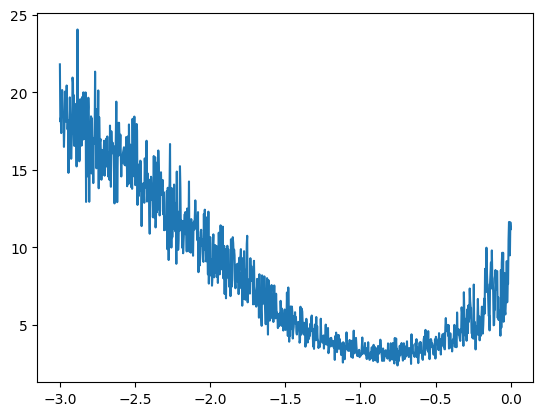

In [55]:
plt.plot(lri, lossi)

In [56]:
# exponent of learning rate
# sweet spot -1 to -0.5
# 10^-1 = 0.1 (good learning rate)

In [57]:
for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[X[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update

    for p in parameters:
        p.data += -0.1 * p.grad
    
print(loss)

tensor(2.1977, grad_fn=<NllLossBackward0>)


In [58]:
# learning rate decay
# lower learning rate significantly if loss stops decreasing
# last steps of training
for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[X[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update

    for p in parameters:
        p.data += -0.01 * p.grad
    
print(loss)

tensor(2.4804, grad_fn=<NllLossBackward0>)


In [59]:
# a little better

In [60]:
# check whole dataset loss
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss)

tensor(2.3846, grad_fn=<NllLossBackward0>)


In [61]:
# bad practice to only evaluate performance/loss on data that it has been trained with
# need to split into training set and validation set to prevent overfitting

# 80% training, 10% validation, 10% test
# training to optimize params
# validation on development of hyper params (ex. size of hidden layer, size of embeddings)
# test to calculate performance of model at the end

In [62]:
# reset

# build the dataset
def build_dataset(words):
    block_size = 3 # context length: how many characters to predict the next
    X, Y = [], [] # X input, Y labels
    for w in words: # only take the first 5 for now
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words)) # training up to index n1
n2 = int(0.9 * len(words)) # validation between index n1 and n2 - 1

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [63]:
# trainin dataset
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [64]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[Xtr[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss)

tensor(2.4622, grad_fn=<NllLossBackward0>)


In [65]:
# evaluate loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss)

tensor(2.5093, grad_fn=<NllLossBackward0>)


In [66]:
# evaluate loss on training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss)

tensor(2.5089, grad_fn=<NllLossBackward0>)


In [67]:
# evaluate loss on testing set
emb = C[Xte]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss)

tensor(2.5129, grad_fn=<NllLossBackward0>)


In [68]:
# training loss and dev loss is equal 
# underfitting or too small of a network
# need to increase the size of the neural net

In [69]:
# increase neurons to 300
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [70]:
sum(p.nelement() for p in parameters) # 10k params

10281

In [71]:
for p in parameters:
    p.requires_grad = True
    
# keep track of steps
stepi = []
lossi = []

for i in range(30000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[Xtr[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.item())

print(loss)

tensor(2.5264, grad_fn=<NllLossBackward0>)


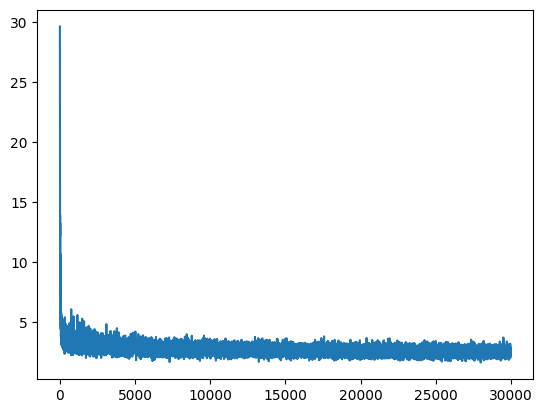

In [72]:
plt.plot(stepi, lossi)

In [73]:
# larger neural nets may take longer training to converge
# batch size may be too low creating too much noise, may be beneficial to incrase it
# keep track of steps
stepi = []
lossi = []

for i in range(30000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[Xtr[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.item())

print(loss)

tensor(2.6111, grad_fn=<NllLossBackward0>)


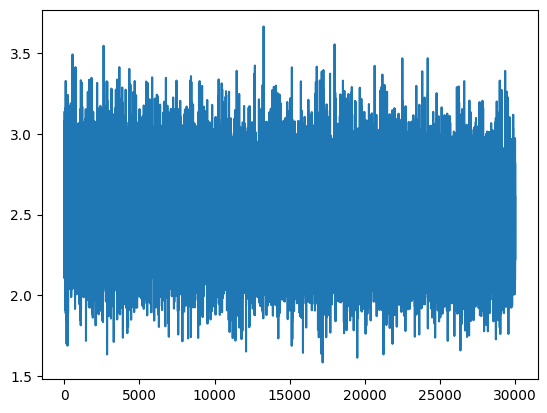

In [74]:
plt.plot(stepi, lossi)

In [75]:
# learning rate decay
for i in range(30000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[Xtr[ix]] # (32, 3, 2)
    # emb.view(-1, 6) == emb.view(emb.shape[0], 6)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.02 * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.item())

print(loss)

tensor(2.1592, grad_fn=<NllLossBackward0>)


In [76]:
# tanh hidden layer is larger, but bottleneck could be not enough character embedding size
# currently we are cramming many characters into 2 dimension embeddings

In [77]:
# total training set loss
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss)

tensor(2.2761, grad_fn=<NllLossBackward0>)


In [78]:
# evaluate loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss)

tensor(2.2816, grad_fn=<NllLossBackward0>)


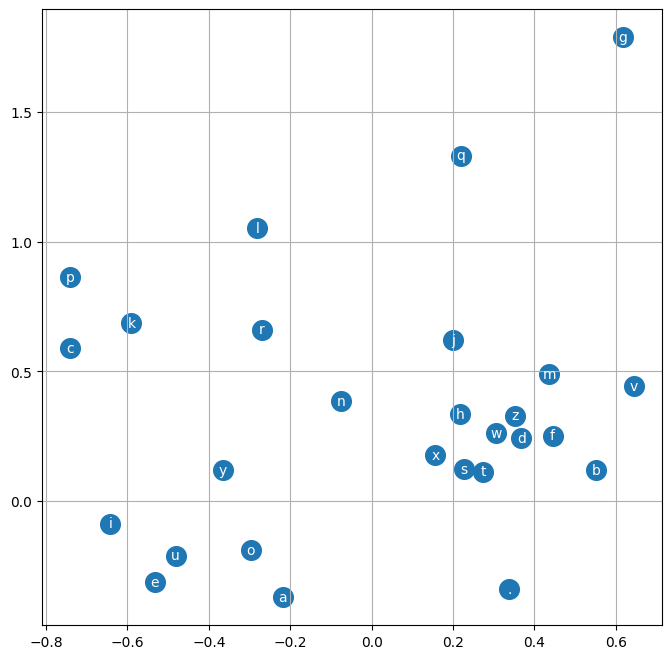

In [79]:
# visualize emebedding vectors
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [80]:
# vowels are clustered together
# embedding make sense
# scale up the size, will not be able to visualize if not 2d

In [81]:
# 200 neurons, increase embedding to 10 dimensions
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g) # 30 inputs go into hidden layer (3 x 10 embeddings)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters) # 11.8k params

11897

In [82]:
for p in parameters:
    p.requires_grad = True
    
# keep track of steps
stepi = []
lossi = []

In [83]:
for i in range(30000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[Xtr[ix]] # (32, 3, 2)
    # change this to 30 from 6
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.1 * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss)

tensor(2.8822, grad_fn=<NllLossBackward0>)


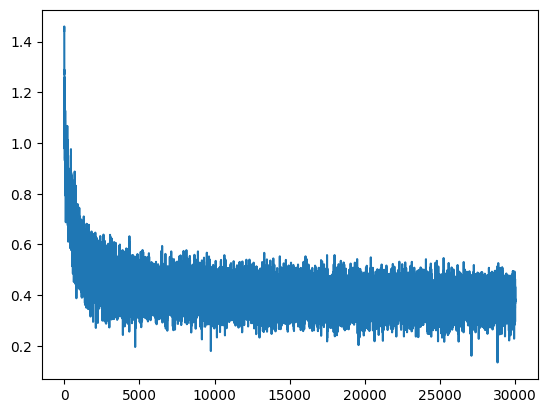

In [84]:
# plot log loss rather than loss to reduce hockey stick 
plt.plot(stepi, lossi)

In [85]:
# total training set loss
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss)

tensor(2.4027, grad_fn=<NllLossBackward0>)


In [86]:
# evaluate loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss)

tensor(2.4223, grad_fn=<NllLossBackward0>)


In [87]:
# learning rate decay
for i in range(50000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,)) # 32 random indexes
    
    # forward pass
    # only getting 32 rows of X
    emb = C[Xtr[ix]] # (32, 3, 2)
    # change this to 30 from 6
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) # be sure to use Y[ix]
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data += -0.01 * p.grad

    # track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss)

tensor(2.2101, grad_fn=<NllLossBackward0>)


In [88]:
# total training set loss
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(loss)

tensor(2.2139, grad_fn=<NllLossBackward0>)


In [89]:
# evaluate loss on dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(loss)

tensor(2.2349, grad_fn=<NllLossBackward0>)


In [90]:
# embedding size may have been the bottleneck

# optimization
    # continue tuning amount of neurons and embedding sizes
    # increase word input (instead of 3 chars use more)
    # continue tweaking learning rate
    # modify the batch size

In [91]:
# evaluate loss on test set
emb = C[Xte]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
print(loss)

tensor(2.2388, grad_fn=<NllLossBackward0>)


In [94]:
# generate samples from model
for i in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        intX = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [intX]
        out.append(intX)
        if intX == 0:
            break
            
    print("".join(itos[i] for i in out))

ashlam.
dhuun.
lacelin.
javia.
rayasalayleia.
eym.
oscetynet.
giyfelicye.
cas.
aalikadhan.
jaer.
vira.
dimi.
amarana.
salyana.
naede.
benter.
iviy.
zon.
molvin.
